Import des librairies

In [1]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

Initialisation du chemin

In [2]:
data = pd.read_csv("monthly_market_arrivals.csv")
# Sort data and define index based on the date column
# data['date'] = pd.to_datetime(data['date'])
data = data.sort_values(by='date').set_index('date')
data.head()


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON


Création d'un jeu de données pour Bangalore seulement en ne gardant que la colonne comprenant le nombre d'oignons vendus

In [4]:
ts_data = data.loc[data.city == "BANGALORE", ["quantity"]]

ts_data.head()

,quantity
date,
2004-01-01,227832
2004-02-01,225133
2004-03-01,221952
2004-04-01,185150
2004-05-01,137390


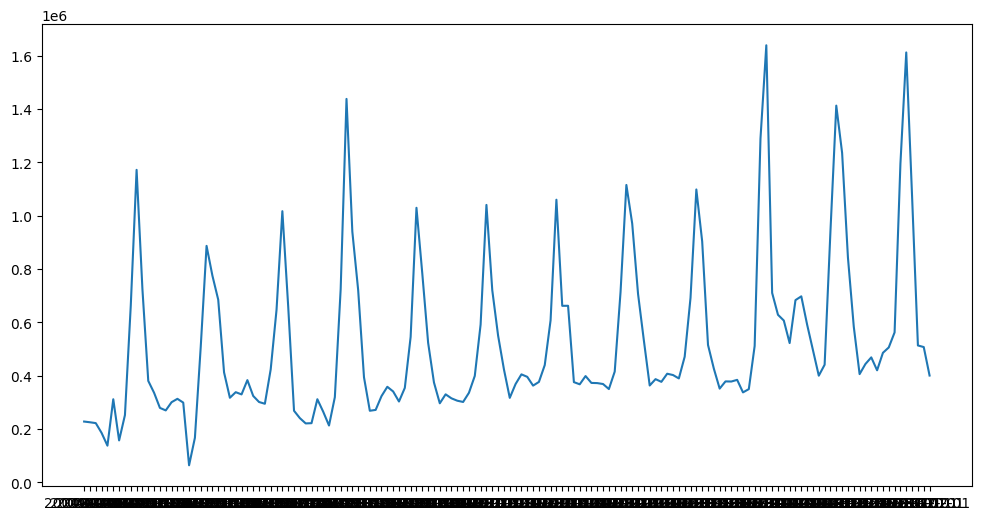

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(ts_data.index, ts_data['quantity'] )
plt.show()

In [9]:
ts_data

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2004-01-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE
2004-02-01,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE
2004-03-01,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE
2004-04-01,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE
2004-05-01,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE
...,...,...,...,...,...,...,...,...,...
2015-10-01,BANGALORE,October,2015,1612160,385,3365,2215,KNT,BANGALORE
2015-11-01,BANGALORE,November,2015,1071872,205,3138,1618,KNT,BANGALORE
2015-12-01,BANGALORE,December,2015,513186,217,2030,1343,KNT,BANGALORE


Importer la librairie tsa qui a une fonction de décomposition en trend + season 

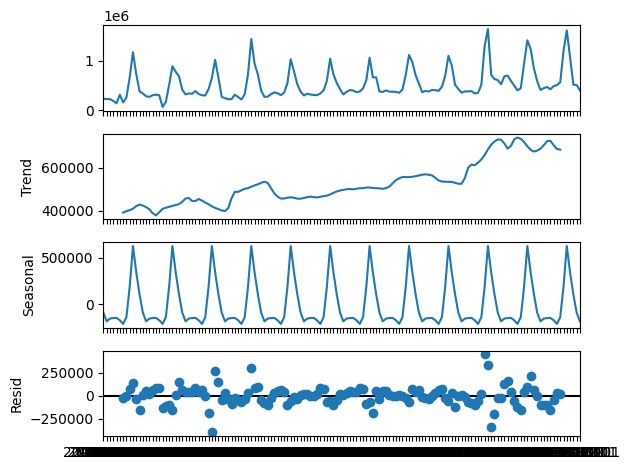

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_data_copy = ts_data.copy()
decomposition = seasonal_decompose(ts_data_copy, model='additive', period=12)

decomposition.plot()
plt.show()

In [ ]:
value_column = 'quantity'


Etape 1. Variables décalées ou Lags
Construire les variables décalées de 1 à 7 mois

In [19]:
for lag in range(1, 8):
   ts_data[f'lag_{lag}'] = ts_data['quantity'].shift(lag)

ts_data.dropna(inplace=True)
ts_data.head(10)

,quantity,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
date,,,,,,,,
2004-08-01,251984,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,227832.0
2004-09-01,662382,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0
2004-10-01,1171846,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0
2004-11-01,724140,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0
2004-12-01,380379,724140.0,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0
2005-01-01,335679,380379.0,724140.0,1171846.0,662382.0,251984.0,157022.0,311445.0
2005-02-01,279047,335679.0,380379.0,724140.0,1171846.0,662382.0,251984.0,157022.0
2005-03-01,269609,279047.0,335679.0,380379.0,724140.0,1171846.0,662382.0,251984.0
2005-04-01,300428,269609.0,279047.0,335679.0,380379.0,724140.0,1171846.0,662382.0


Etape 2: Diviser le jeu de données en un jeu train et un jeu test
train - les premiers mois 85% 
test - les derniers mois 15% 
Utiliser les fonctions de scikitlearn 
Dans X on ne garde que les variables ou features
Dans y on ne garde que la variabe à prédire

In [21]:
from sklearn.model_selection import train_test_split

X = ts_data.drop(columns=value_column)
y = ts_data[value_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

X_train.shape, X_test.shape

((118, 7), (21, 7))

Etape 3. Effectuer une régression linéaire sur le jeu train et calculer le  R2 sur le jeu test. 
Représenter graphiquement les valeurs prédites et les vraies valeurs

In [ ]:
from  import 
from  import 



Etape 4. Variables aggrégées + fonction pour préparer les données en une seule fois

- diviser les données en train/test avec 15% de test 
- ajouter les variables décalées
- ajouter les moyennes mensuelles

In [ ]:
# Function that returns a dictionary where:
# the keys correspond to unique values of `cat_feature`, and
# the values correspond to average values of `value_feature`.
def get_mean_by_cat():
    return 

In [ ]:
from  import 

def preprocess_data(data, lag_start=1, lag_end=9, test_size=0.15):

    data = pd.DataFrame(data.copy())

    # add time series lags as features
    
    # drop NaNs generated by adding lag features
   
    
    X = 
    y = 

    # calculate average values only on train data to avoid data leak
    
    # drop features that have been used for calculating average values of the target variable
   
    return 

In [ ]:
ts_data = pd.read_csv(data_path)

X_train.head()

Etape 5. Effectuer la régression linéaire en utilisant les variables aggrégées.
Entraîner le modèle sur le jeu train et calculer le R2 sur le jeu test. 
Afficher les valeurs observées et prédites.

In [ ]:
from import 
from  import 



Etape 6. Essayer avec des lag differents allant de 1 à 11.

In [ ]:
Etape 7. Essayer un autre modèle de régression tel que RandomForest
Voir si cela améliore la qualité du modèle

In [ ]:
from  import 



Etape 8. Essayer d'améliorer le modèle
Ajouter la variable priceMod comme variable explicative supplémentaire.

Changer de modèle de regression et ajuster les tuning parameters

In [ ]:

X_train, X_test, y_train, y_test = preprocess_data(ts_data, lag_end=12)

